### Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


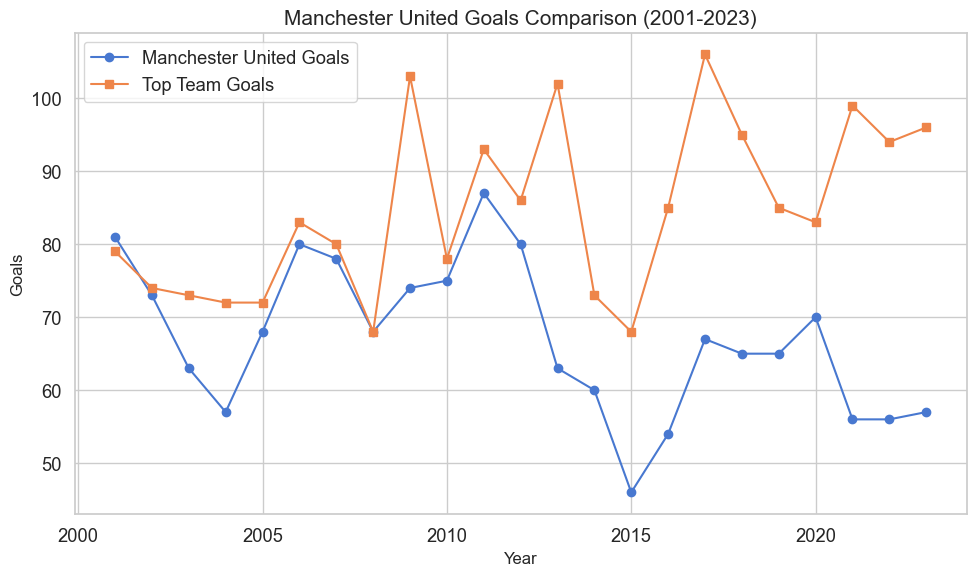

In [3]:
table_folder = os.listdir('./data/seasonTeamData')
paths = os.listdir('./data/seasonPlayerData')
years = list(range(2001, 2024, 1))

team_goals = []
for path in paths:
    data_path = './data/seasonPlayerData/' + path
    team_goals.append(pd.read_csv(data_path).iloc[-2].iloc[6])
top_team_goals = []
for path in table_folder:
    data_path = './data/seasonTeamData/' + path
    top_team_goals.append(pd.read_csv(data_path).iloc[0].iloc[5])
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(10, 6))
plt.plot(years, team_goals, marker='o', label='Manchester United Goals')
plt.plot(years, top_team_goals, marker='s', label='Top Team Goals')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.title('Manchester United Goals Comparison (2001-2023)', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

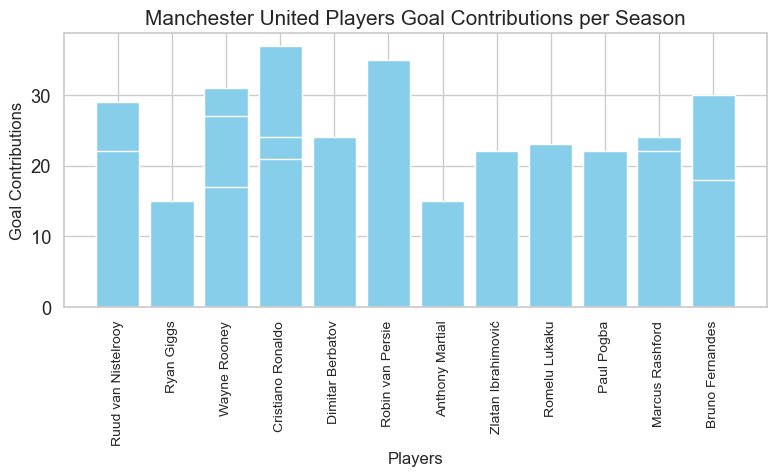

In [4]:
import matplotlib.pyplot as plt
paths = os.listdir('data/seasonPlayerData')
players = []
contributions = []
for path in paths:
    data_path = './data/seasonPlayerData/' + path
    df = pd.read_csv(data_path).iloc[:-2]
    max_contribution = df[df['G+A'] == df['G+A'].max()]
    players.append(max_contribution.iloc[0,0])
    contributions.append(max_contribution.iloc[0,8])

plt.figure(figsize=(8, 5))  # Optional: Set figure size
plt.bar(players, contributions, color='skyblue')

plt.xlabel('Players', fontsize=12)
plt.ylabel('Goal Contributions', fontsize=12)
plt.title('Manchester United Players Goal Contributions per Season', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [5]:
players

['Ruud van Nistelrooy',
 'Ruud van Nistelrooy',
 'Ruud van Nistelrooy',
 'Ryan Giggs',
 'Wayne Rooney',
 'Wayne Rooney',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'Wayne Rooney',
 'Dimitar Berbatov',
 'Wayne Rooney',
 'Robin van Persie',
 'Wayne Rooney',
 'Wayne Rooney',
 'Anthony Martial',
 'Zlatan Ibrahimović',
 'Romelu Lukaku',
 'Paul Pogba',
 'Marcus Rashford',
 'Bruno Fernandes',
 'Cristiano Ronaldo',
 'Marcus Rashford',
 'Bruno Fernandes']

In [6]:
contributions

[27.0,
 29.0,
 22.0,
 15.0,
 25.0,
 25.0,
 37.0,
 24.0,
 29.0,
 24.0,
 31.0,
 35.0,
 27.0,
 17.0,
 15.0,
 22.0,
 23.0,
 22.0,
 24.0,
 30.0,
 21.0,
 22.0,
 18.0]

In [7]:
years = list(range(2001,2024,1))

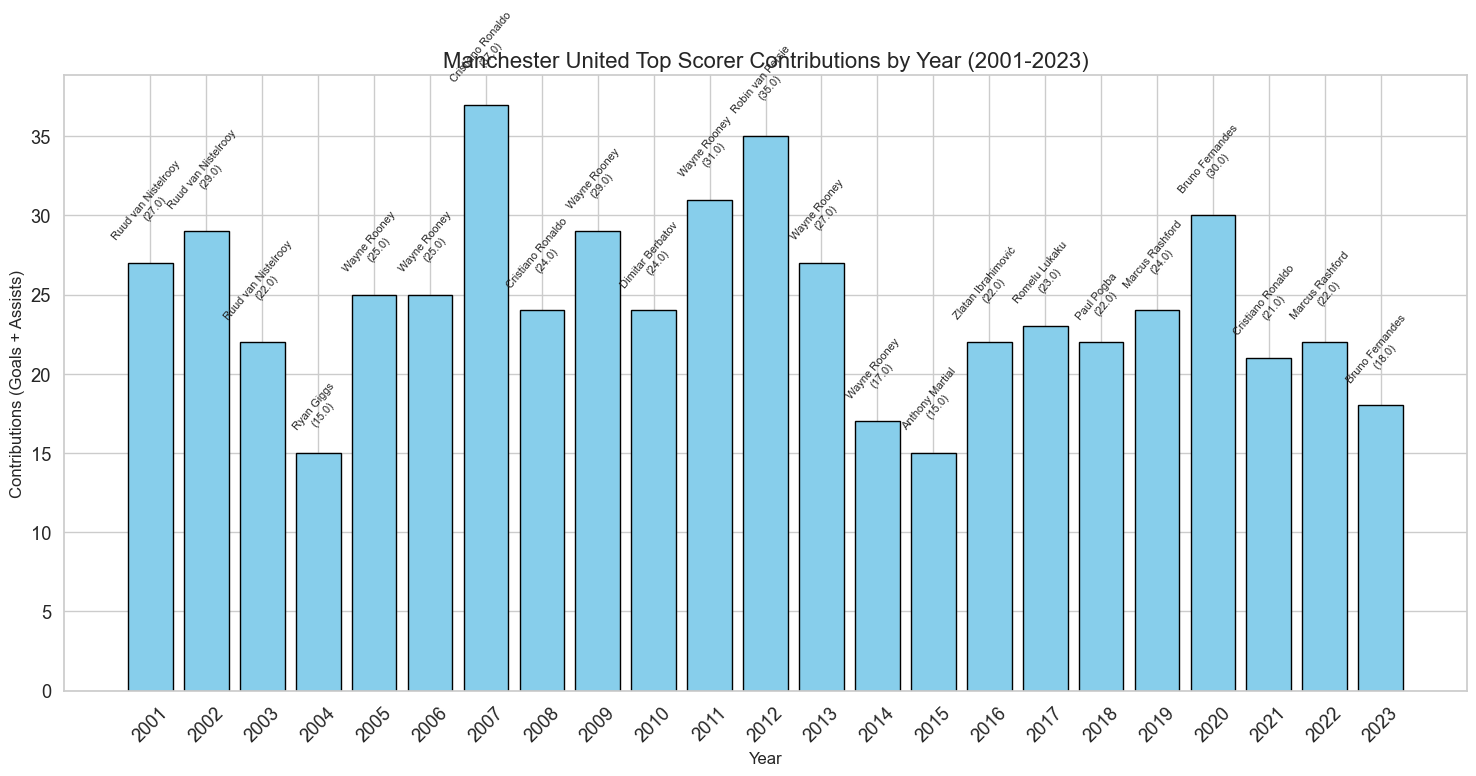

In [ ]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(15, 8))
plt.bar(years, contributions, color='skyblue', edgecolor='black')

# Adding labels
for i, contribution in enumerate(contributions):
    plt.text(years[i], contribution + 1, f"{players[i]}\n({contribution})",
             ha='center', fontsize=8, rotation=80)

plt.title('Manchester United Top Scorer Contributions by Year (2001-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Contributions (Goals + Assists)', fontsize=12)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Show plot
plt.show()
